In [26]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [27]:
def get_lineout_idx(Min,Max,lineout_pos,n_grid_points):
    if lineout_pos < Min or lineout_pos > Max:
        print('Lineout position is out of range:[',Min,',',Max,']!')
        return 0
    return int((n_grid_points-1) / (Max - Min) * (lineout_pos - Min) + 0.5)

# filename = '../QuickPIC/2/Species0001/Charge_slice_0001/charge_slice_xz_00000000.h5'
def get_transverse_lineout(filename,lineout_pos_xi,code):
    with h5py.File(filename, 'r') as h5file:
        dset_name = list(h5file.keys())[1] # dset_name = 'charge_slice_xz'
        data = np.array(h5file[dset_name])
        n_grid_points_xi, n_grid_points_x = data.shape
        x_range = np.array(h5file['AXIS']['AXIS1'])
        xi_range = np.array(h5file['AXIS']['AXIS2'])

    #     lineout_pos_xi = 0
        lineout_idx_xi = get_lineout_idx(xi_range[0],xi_range[1],lineout_pos_xi,n_grid_points_xi)
        if code == 'QuickPIC':
            lineout = data[lineout_idx_xi][1:] # get rid of the empty data in the first column
        elif code == 'QPAD':
            lineout = data[lineout_idx_xi][:]
        else:
            print('Wrong argument for code!')
            return
        x = np.linspace(x_range[0],x_range[1],num = len(lineout))
        return x,lineout


def select_lineout_range(x,lineout,x_min,x_max):
    if x_min < x[0] or x_max > x[-1] or x_min > x_max:
        print('Invalid lineout range!')
        return x,lineout
    x_min_idx = get_lineout_idx(x[0],x[-1],x_min,len(x)) 
    x_max_idx = get_lineout_idx(x[0],x[-1],x_max,len(x))
    return x[x_min_idx:x_max_idx+1],lineout[x_min_idx:x_max_idx+1]

# Plot ion density lineout

In [38]:
# Get lineout 
filename_QPAD = './nb0_500/16384/Species1/Charge/Merged_angle_0/charge_00000001.h5'
lineout_position = 0
x_QPAD, lineout_QPAD = get_transverse_lineout(filename_QPAD,lineout_position,'QPAD')

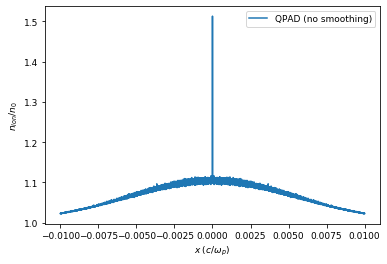

In [39]:
# select visualization range
x_min = -0.01
x_max = 0.01

x_QPAD, lineout_QPAD = select_lineout_range(x_QPAD, lineout_QPAD, x_min, x_max)

### Plot the data
plt.plot(x_QPAD, lineout_QPAD,label = 'QPAD (no smoothing)')
plt.legend(loc='upper right')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 9})
plt.show()

# Plot focusing field lineout

In [40]:
# Get lineout 
filename_QPAD = './nb0_500/16384/Fields/Fr/Merged_angle_0/fr_00000001.h5'
lineout_position = 0
x_QPAD, lineout_QPAD = get_transverse_lineout(filename_QPAD,lineout_position,'QPAD')

Invalid lineout range!


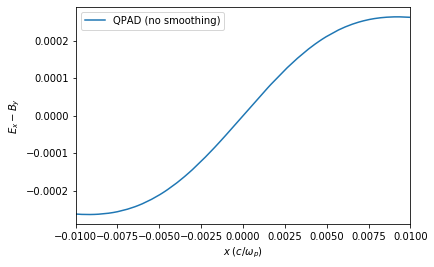

In [42]:
# select visualization range
x_min = -0.01
x_max = 0.01

# # Flip QPAD's result
n = len(lineout_QPAD) // 2
for i in range(n):
    lineout_QPAD[i] = -lineout_QPAD[i]

# select visualization range
x_QPAD, lineout_QPAD = select_lineout_range(x_QPAD, lineout_QPAD, x_min, x_max)

### Plot the data
plt.plot(x_QPAD, lineout_QPAD,label = 'QPAD (no smoothing)')
plt.legend(loc='best')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.xlim([x_min,x_max])
plt.ylabel('$E_x - B_y$')
plt.rcParams.update({'font.size': 10})
plt.show()

# Perform a linear regression

0.0007264187866927729


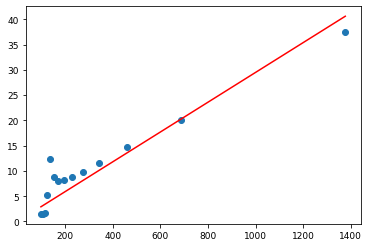

In [57]:
first_pos_idx = (len(x_QPAD) + 1)// 2
x_pos_QPAD = x_QPAD[first_pos_idx :]
print(x_pos_QPAD[0])
lineout_pos_QPAD = lineout_QPAD[first_pos_idx :]
x_pos_QPAD_inverse = 1 / x_pos_QPAD
plt.scatter(x_pos_QPAD_inverse,lineout_pos_QPAD)

x_pos_QPAD_inverse = x_pos_QPAD_inverse.reshape(-1,1)
lineout_pos_QPAD = lineout_pos_QPAD.reshape(-1,1)
model = LinearRegression(fit_intercept=False)
model.fit(x_pos_QPAD_inverse,lineout_pos_QPAD)
lineout_pos_QPAD_pred = model.predict(x_pos_QPAD_inverse)
plt.plot(x_pos_QPAD_inverse, lineout_pos_QPAD_pred, color='red')


# Simple example of performing linear regression in Python

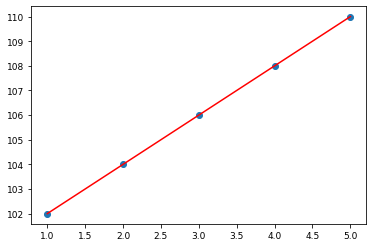

In [58]:
a = np.array([1,2,3,4,5])
b = 2 * a + 100
a = a.reshape(-1,1)
b = b.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(a,b)
b_pred = model.predict(a)

plt.scatter(a, b)
plt.plot(a, b_pred, color='red')
plt.show()